In [432]:


#Usado em todo Projeto 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



In [433]:
teste = pd.read_csv("Corona_NLP_test.csv")
treino = pd.read_csv("Corona_NLP_train.csv",encoding='latin-1')

data = pd.concat([teste,treino])
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44955 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       44955 non-null  int64 
 1   ScreenName     44955 non-null  int64 
 2   Location       35531 non-null  object
 3   TweetAt        44955 non-null  object
 4   OriginalTweet  44955 non-null  object
 5   Sentiment      44955 non-null  object
dtypes: int64(2), object(4)
memory usage: 2.4+ MB


## Tratar dados

In [434]:
# Remover as colubas que não nós influencia

data = data.drop(columns=[ "UserName","ScreenName","Location","TweetAt"], axis=1)

In [435]:
def categorize_sentiment(score):
    if score == 'Negative':
        return "Negative"
    elif score == 'Extremely Negative':
        return "Negative"
    elif score == 'Positive':
        return "Positive"
    elif score == 'Extremely Positive':
        return "Positive"
    else:
        return "Neutral"

In [436]:
data['Sentiment'] = data['Sentiment'].apply(categorize_sentiment)

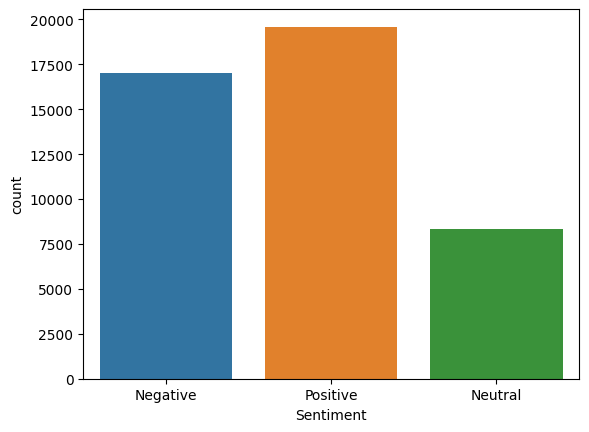

In [437]:
sns.countplot(x=data["Sentiment"])
plt.show()

In [438]:
# Fazer TOKENIZACAO das palavras

import nltk

nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\alexa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\alexa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [439]:
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


import string

wnl = WordNetLemmatizer()
stop_words = stopwords.words('english')

def clean_text(text):
    text = text.lower().split()

    # Remover a pontuação das palavras
    text = [word.translate(str.maketrans('', '', string.punctuation)) for word in text]
    
    #Remover as stopwords do textos
    text = [word for word in text if word not in stop_words]

    #Lemmarization das palavras
    text = [wnl.lemmatize(word) for word in text]
    joined = ' '.join(text)

    return joined



In [440]:
data['text'] = data["OriginalTweet"].apply(clean_text)

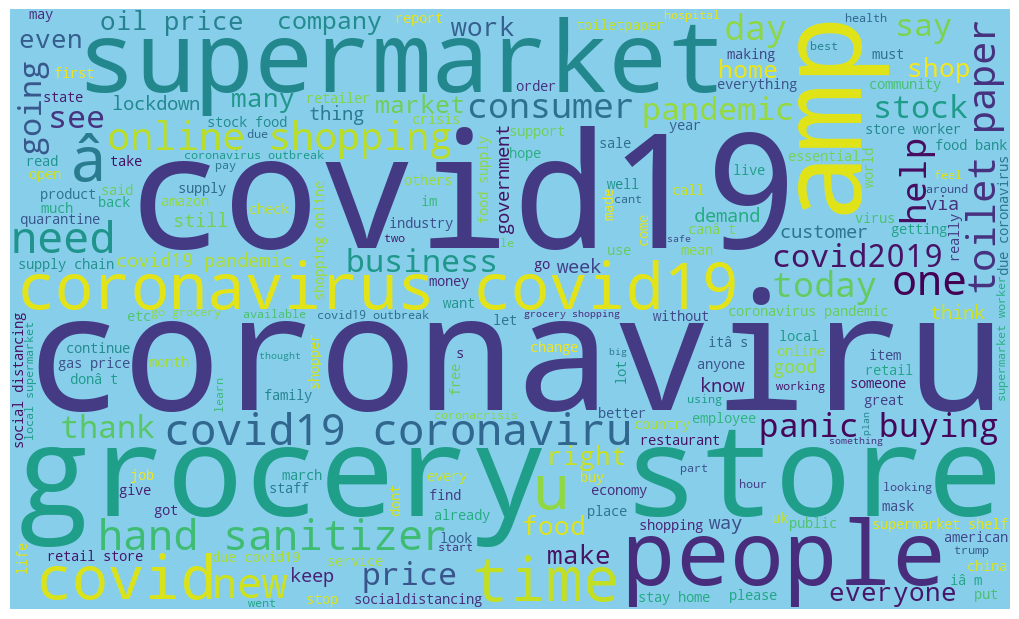

In [441]:
all_words = ' '.join(word for word in data['text'])
from wordcloud import WordCloud
wordcloud = WordCloud(
    width = 1000,
    height = 600,
    background_color = 'skyblue',
    min_font_size = 10).generate(all_words)
plt.figure(figsize = (10, 6), facecolor = None) 
plt.imshow(wordcloud)
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()



In [442]:
all_words = all_words.split()


In [443]:
from nltk.probability import FreqDist
fq =  FreqDist(word for word in all_words)

In [444]:
fq.most_common(10)

[('coronavirus', 19467),
 ('covid19', 19287),
 ('price', 9401),
 ('store', 9347),
 ('food', 8558),
 ('supermarket', 8299),
 ('grocery', 7612),
 ('people', 6323),
 ('amp', 5532),
 ('consumer', 5341)]

In [445]:
y = data["Sentiment"]


In [446]:
data = data.drop(columns=["Sentiment"])

In [447]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
le = LabelEncoder()
y =  le.fit_transform(y)

X = data["text"]
vec = TfidfVectorizer(ngram_range=(1,2), max_features=2500)
X = vec.fit_transform(X).toarray()

In [448]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [449]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5,random_state=42)

In [450]:
# from sklearn.decomposition import PCA

# pca = PCA(n_components=2)
# XTrain = pca.fit_transform(X_train)
# XTest = pca.transform(X_test)

In [451]:
# print(pca.explained_variance_ratio_)

[0.00983495 0.00724652]


In [452]:
from sklearn.linear_model import LogisticRegression


model = LogisticRegression(max_iter=10000, random_state=42)
model.fit(X_train, y_train)


LogisticRegression(max_iter=10000, random_state=42)

In [453]:
from sklearn.linear_model import SGDClassifier
modelSGDL = SGDClassifier(loss='log_loss', random_state=42)
modelSGDL.fit(X_train, y_train)

SGDClassifier(loss='log_loss', random_state=42)

In [457]:
from sklearn.tree import DecisionTreeClassifier

modelTree = DecisionTreeClassifier(random_state=42)
modelTree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [458]:
y_pred = model.predict(X_test)
y_pred_SGDL = modelSGDL.predict(X_test)
y_pred_Tree = modelTree.predict(X_test)

In [459]:
#Creating a function to display model results
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

def evaluation_parametrics(name,y_test, y_pred):
    cm_test = confusion_matrix(y_test, y_pred)
    t1 = ConfusionMatrixDisplay(cm_test)    
    print("Classification Report for Data Test")
    print(classification_report(y_test, y_pred))
    t1.plot()

Classification Report for Data Test
              precision    recall  f1-score   support

           0       0.77      0.78      0.77      8563
           1       0.68      0.58      0.63      4161
           2       0.78      0.82      0.80      9754

    accuracy                           0.76     22478
   macro avg       0.74      0.73      0.73     22478
weighted avg       0.76      0.76      0.76     22478



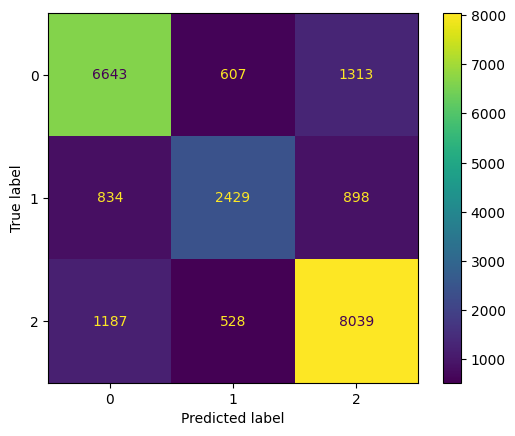

In [460]:
#Visualizing model results
evaluation_parametrics("Machine Learning - Classification", y_test, y_pred)

Classification Report for Data Test
              precision    recall  f1-score   support

           0       0.72      0.79      0.75      8563
           1       0.69      0.46      0.55      4161
           2       0.76      0.81      0.78      9754

    accuracy                           0.74     22478
   macro avg       0.72      0.68      0.70     22478
weighted avg       0.73      0.74      0.73     22478



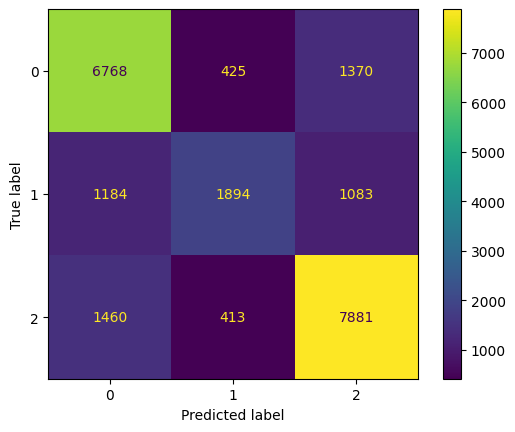

In [461]:
#Visualizing model results
evaluation_parametrics("Machine Learning - Classification", y_test, y_pred_SGDL)

Classification Report for Data Test
              precision    recall  f1-score   support

           0       0.61      0.58      0.60      8563
           1       0.46      0.53      0.50      4161
           2       0.67      0.65      0.66      9754

    accuracy                           0.60     22478
   macro avg       0.58      0.59      0.58     22478
weighted avg       0.61      0.60      0.61     22478



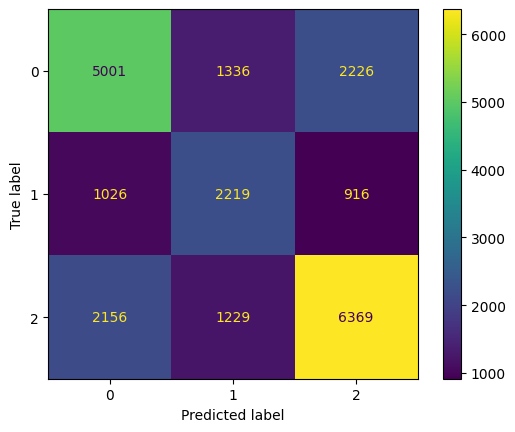

In [462]:
#Visualizing model results
evaluation_parametrics("Machine Learning - Classification", y_test, y_pred_Tree)